In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(12345)

x = torch.from_numpy(np.arange(0, 100) + np.random.normal(0, 3, size=100))

y = torch.from_numpy(np.concatenate((
    np.random.normal(1, 0.5, size=10),
    np.random.normal(1, 0.5, size=10),
    np.random.normal(3, 0.5, size=10),
    np.random.normal(5, 0.5, size=40),
    np.random.normal(3, 0.5, size=30),
)))

In [2]:
import torch

init_ww = {
    'w_10': torch.tensor([.05], requires_grad=True),
    'w_11': torch.tensor([.03], requires_grad=True),
    'w_12': torch.tensor([.01], requires_grad=True),
    'w_13': torch.tensor([.02], requires_grad=True),
    'w_20': torch.tensor([.10], requires_grad=True),
    'w_21': torch.tensor([.30], requires_grad=True),
    'w_22': torch.tensor([.20], requires_grad=True),
}

# bias, always 1
b_00 = torch.tensor(1.)
b_10 = torch.tensor(1.)

# activation function
f = lambda x: 2.7 ** x
# f = lambda x: torch.log(1 + ( 2.7 ** x))

def myDeep(ww, pt):
    x_11 = (b_00 * ww['w_10']) + (pt * ww['w_11'])
    x_12 = (b_00 * ww['w_12']) + (pt * ww['w_13'])
    a_11 = f(x_11)
    a_12 = f(x_12)
    return (b_10 * ww['w_20']) + (a_11 * ww['w_21']) + (a_12 * ww['w_22'])

In [3]:
def cost(y_pop, y_hat):
    diff = y_pop - y_hat
    return torch.square(y_pop - y_hat).sum()

lr = 0.0001

for t in range(1000):
    # forward pass
    y_hat = myDeep(init_ww, x)
    loss = cost(y, y_hat)
    if t % 100 == 0: print("loss:", loss.item())
    loss.backward()

    # Backprop to compute gradients with respect to loss
    grad_w_10 = init_ww['w_10'].grad
    grad_w_11 = init_ww['w_11'].grad
    grad_w_12 = init_ww['w_12'].grad
    grad_w_13 = init_ww['w_13'].grad
    grad_w_20 = init_ww['w_20'].grad
    grad_w_21 = init_ww['w_21'].grad
    grad_w_22 = init_ww['w_22'].grad

    # print("grad_w_20", grad_w_20)
    # print("grad_w_21", grad_w_21)
    # print("grad_w_22", grad_w_22)
    # print("grad_w_10", grad_w_10)
    # print("grad_w_11", grad_w_11)
    # print("grad_w_12", grad_w_12)
    # print("grad_w_13", grad_w_13)

    with torch.no_grad():
        init_ww['w_10'] -= grad_w_10 * lr
        init_ww['w_11'] -= grad_w_11 * lr
        init_ww['w_12'] -= grad_w_12 * lr
        init_ww['w_13'] -= grad_w_13 * lr
        init_ww['w_20'] -= grad_w_20 * lr
        init_ww['w_21'] -= grad_w_21 * lr
        init_ww['w_22'] -= grad_w_22 * lr

        grad_w_10.zero_()
        grad_w_11.zero_()
        grad_w_12.zero_()
        grad_w_13.zero_()
        grad_w_20.zero_()
        grad_w_21.zero_()
        grad_w_22.zero_()

# print("w_11", init_ww['w_11'])
# print("w_13", init_ww['w_13'])
# print("w_10", init_ww['w_10'])
# print("w_12", init_ww['w_12'])
# print("w_21", init_ww['w_21'])
# print("w_22", init_ww['w_22'])
# print("w_20", init_ww['w_20'])

loss: 652.4395819579156
loss: 278.47635970500494
loss: 257.4893570383542
loss: 256.83966932628323
loss: 256.57589451501144
loss: 256.32097266074663
loss: 256.06325345587743
loss: 255.7978342979481
loss: 255.51956493382895
loss: 255.2225635041981


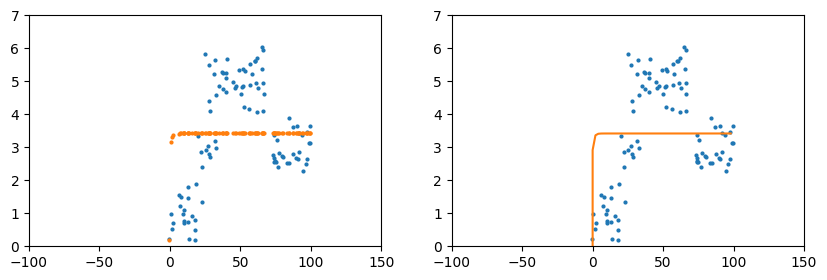

In [4]:
plt.rcParams['lines.markersize'] = 2
fig, axs = plt.subplots(ncols=2, figsize=(10, 3))
axs[0].set_xlim(-100, 150)
axs[0].set_ylim(0, 7)
axs[0].scatter(x, y);
axs[0].scatter(x, myDeep(init_ww, x).detach().numpy());

domain = torch.from_numpy(np.arange(-100, 100, 2))
axs[1].set_xlim(-100, 150)
axs[1].set_ylim(0, 7)
axs[1].scatter(x, y);
axs[1].plot(domain, myDeep(init_ww, domain).detach().numpy(), color="#ff7f0f");